## HCP DTI Exploratory Data Analysis

### Imports

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from imports import *

In [10]:
from models import *
from data import * 
from env import *
from harmonize import *
from sim import *

In [11]:
# overall imports
import importlib
import data

# data load
from data.data_load import load_transcriptome, load_connectome, load_coords
from data.data_viz import plot_connectome, plot_connectome_with_labels, plot_transcriptome
importlib.reload(data.data_load)
importlib.reload(data.data_viz)

# data utils
from data.data_utils import (
    reconstruct_connectome,
    reconstruct_upper_triangle,
    make_symmetric,
    expand_X_symmetric,
    expand_Y_symmetric,
    expand_X_symmetric_shared,
    expand_X_Y_symmetric_conn_only,
    expand_shared_matrices,
    expand_X_symmetric_w_conn, 
    process_cv_splits, 
    process_cv_splits_conn_only_model, 
    expanded_inner_folds_combined_plus_indices
)

import data.data_utils
importlib.reload(data.data_utils)

# cross-validation classes
import data.cv_split
from data.cv_split import RandomCVSplit, SchaeferCVSplit, CommunityCVSplit, SubnetworkCVSplit
importlib.reload(data.cv_split)

# sim class
import sim.sim 
from sim.sim import Simulation
importlib.reload(sim.sim)


<module 'sim.sim' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim.py'>

## HCP1200 DTI EDA

In [12]:
HCP_path = os.path.normpath(os.getcwd() + os.sep + os.pardir) + '/GeneEx2Conn_data/HCP1200_DTI/'
print(HCP_path)

/scratch/asr655/neuroinformatics/GeneEx2Conn_data/HCP1200_DTI/


Load connectomes

In [43]:
# Load stuctural connectome from ENIGMA
HCP_enigma_structural_count = load_connectome(measure='SC')
HCP_enigma_structural_count_cortical = HCP_enigma_structural_count[:100, :100]

# Load 156-region structural connectivity matrices
HCP1200_S156_structural_count = np.log1p(loadmat(HCP_path + '/4S156/4S156_DTI_count.mat')['connectivity'])
HCP1200_S156_structural_count_cortical = HCP1200_S156_structural_count[:100, :100]
HCP1200_S156_structural_QA = loadmat(HCP_path + '/4S156/4S156_DTI_QA.mat')['connectivity']
HCP1200_S156_structural_QA_cortical = HCP1200_S156_structural_QA[:100, :100]

# Load 456-region structural connectivity matrices  
HCP1200_S456_structural_count = np.log1p(loadmat(HCP_path + '/4S456/4S456_DTI_count.mat')['connectivity'])
HCP1200_S456_structural_QA = loadmat(HCP_path + '/4S456/4S456_DTI_QA.mat')['connectivity']

All regions


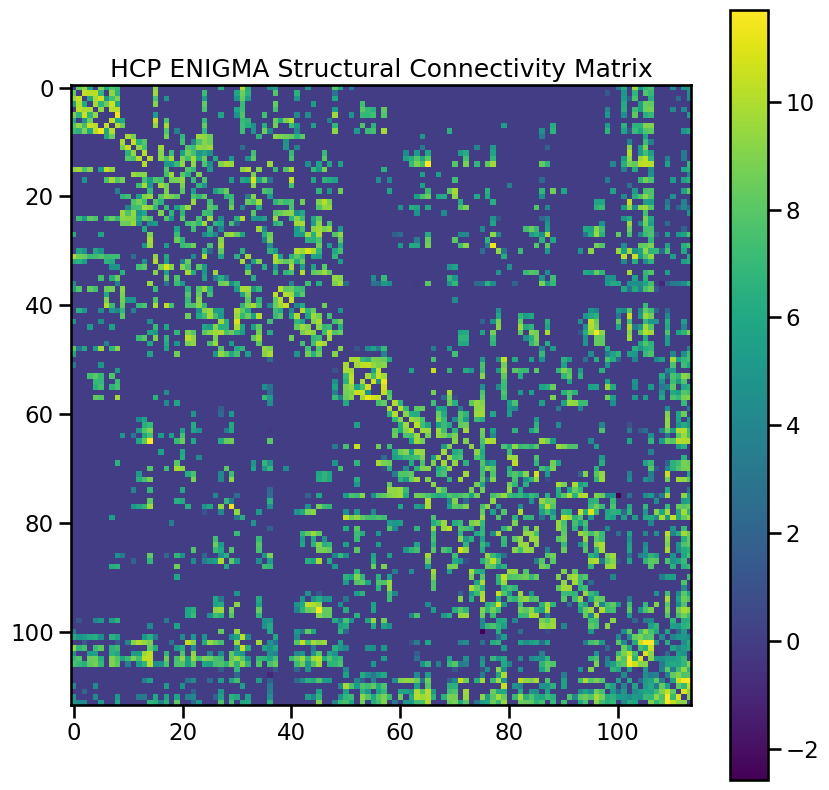

In [46]:
plt.figure(figsize=(10,10))
plt.imshow(HCP_enigma_structural_count, cmap='viridis')
plt.colorbar()
plt.title('HCP ENIGMA Structural Connectivity Matrix')
plt.show()

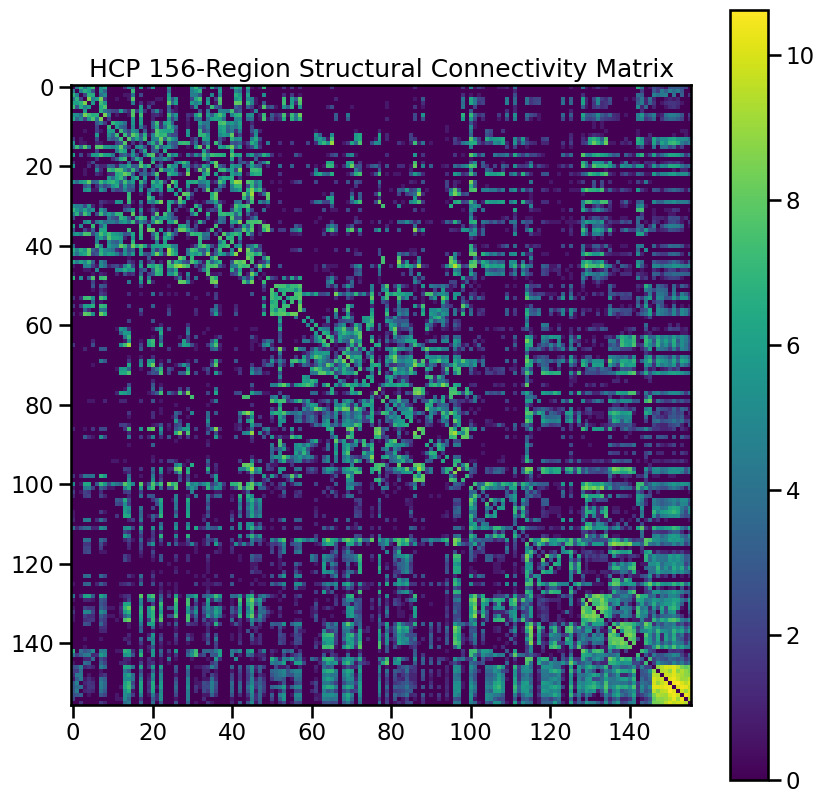

In [47]:
plt.figure(figsize=(10,10))
plt.imshow(HCP1200_S156_structural_count, cmap='viridis')
plt.colorbar()
plt.title('HCP 156-Region Structural Connectivity Matrix')
plt.show()

Cortical only

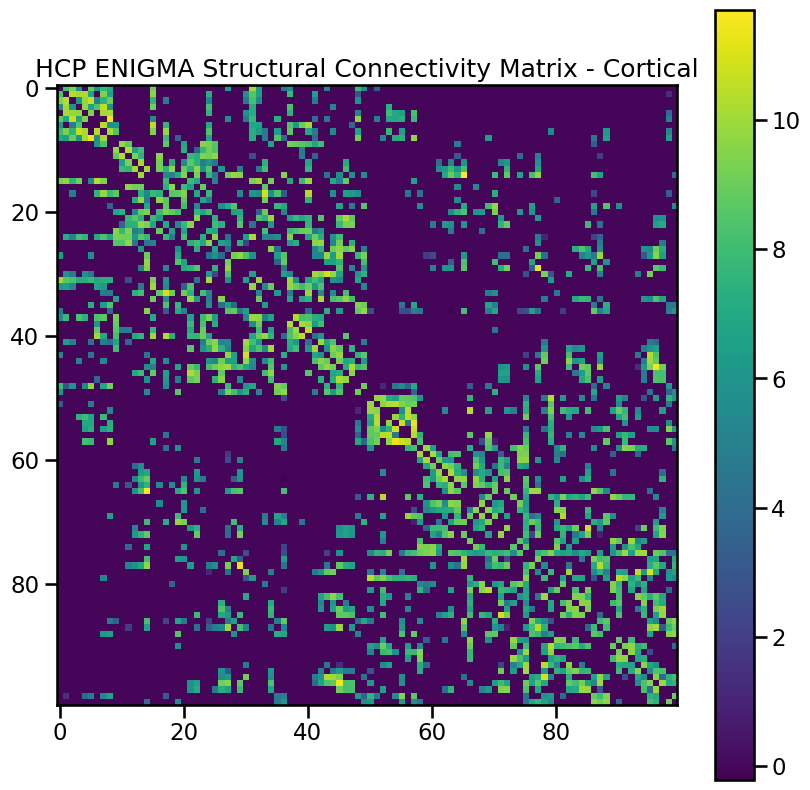

In [50]:
plt.figure(figsize=(10,10))
plt.imshow(HCP_enigma_structural_count_cortical, cmap='viridis')
plt.colorbar()
plt.title('HCP ENIGMA Structural Connectivity Matrix - Cortical')
plt.show()

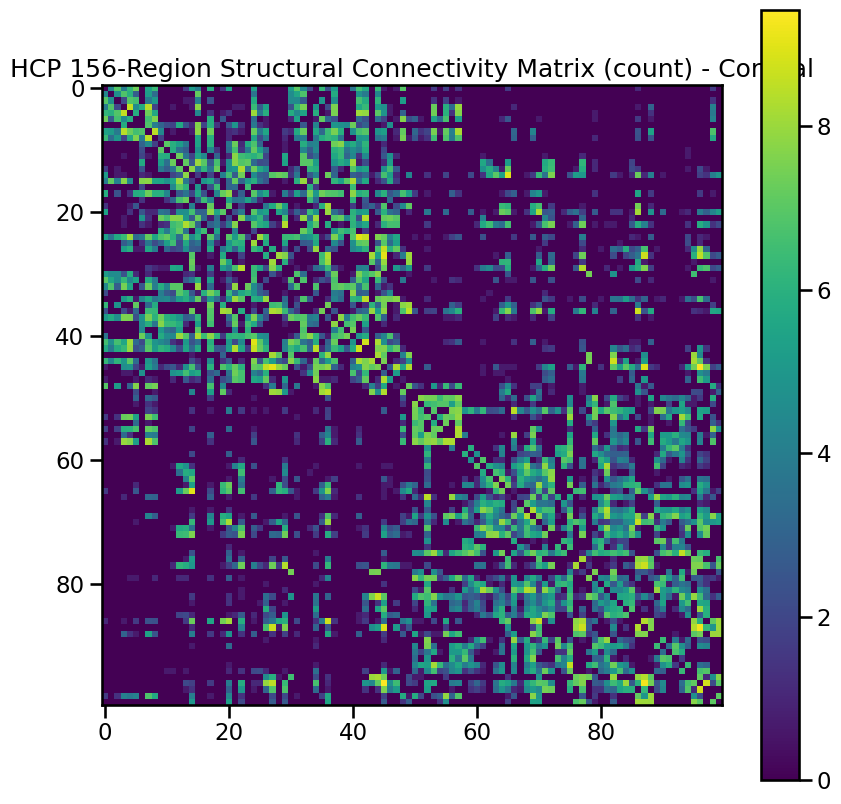

In [51]:
plt.figure(figsize=(10,10))
plt.imshow(HCP1200_S156_structural_count_cortical, cmap='viridis')
plt.colorbar()
plt.title('HCP 156-Region Structural Connectivity Matrix (count) - Cortical')
plt.show()

In [52]:
# Compute correlations between ENIGMA and HCP 156-region cortical connectivity matrices
pearson_corr = np.corrcoef(HCP_enigma_structural_count_cortical.flatten(), 
                          HCP1200_S156_structural_count_cortical.flatten())[0,1]
spearman_corr = spearmanr(HCP_enigma_structural_count_cortical.flatten(),
                                     HCP1200_S156_structural_count_cortical.flatten())[0]
print(f"Pearson correlation between ENIGMA and HCP 156-region cortical connectivity matrices: {pearson_corr:.3f}")
print(f"Spearman correlation between ENIGMA and HCP 156-region cortical connectivity matrices: {spearman_corr:.3f}")

Pearson correlation between ENIGMA and HCP 156-region cortical connectivity matrices: 0.733
Spearman correlation between ENIGMA and HCP 156-region cortical connectivity matrices: 0.644


QA and S456

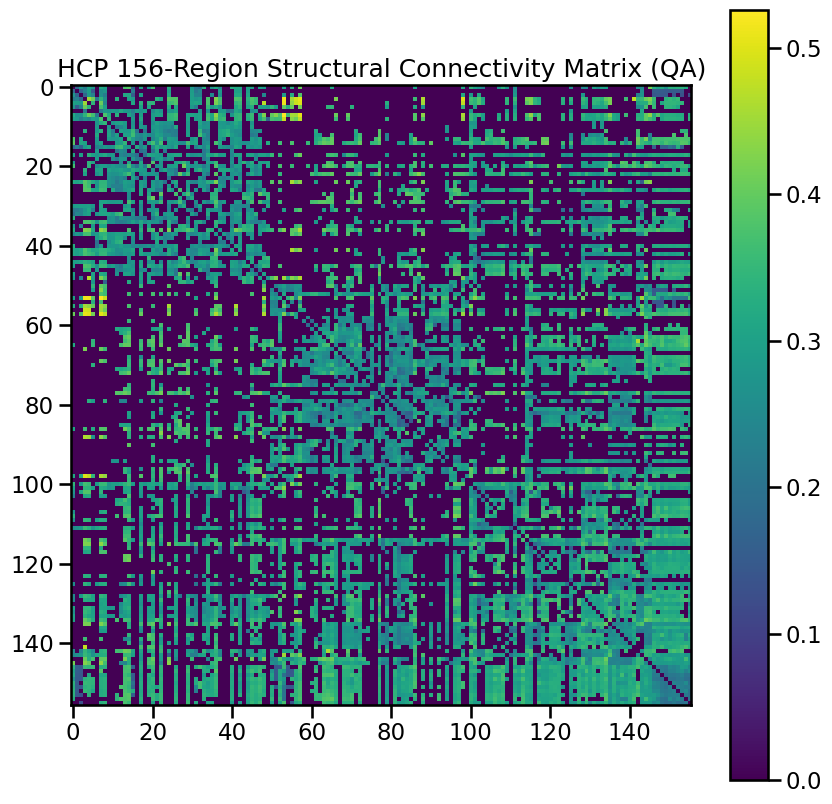

In [53]:
plt.figure(figsize=(10,10))
plt.imshow(HCP1200_S156_structural_QA, cmap='viridis')
plt.colorbar()
plt.title('HCP 156-Region Structural Connectivity Matrix (QA)')
plt.show()

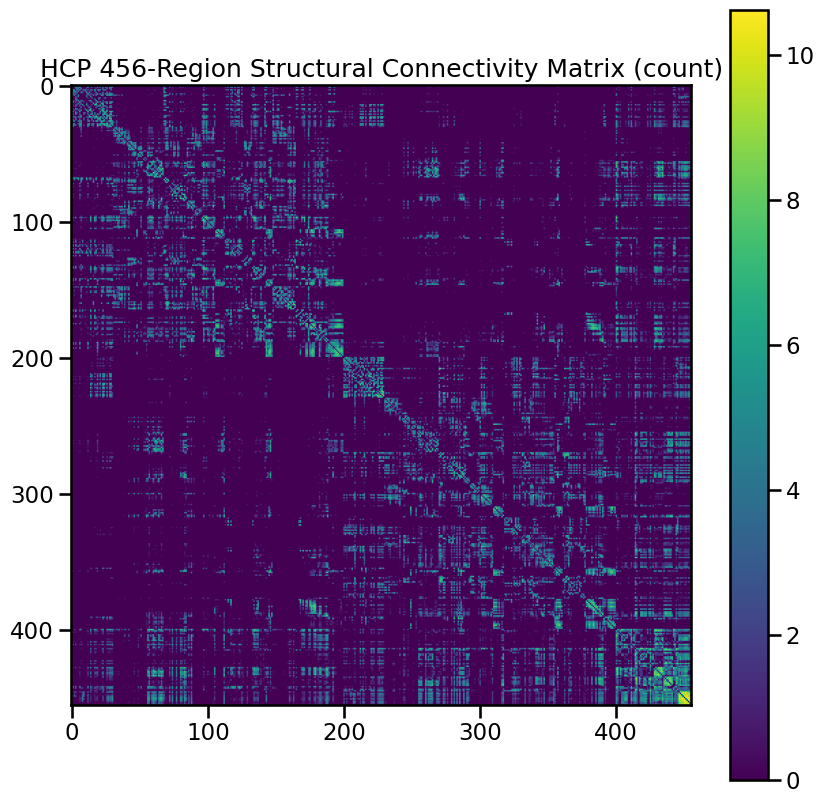

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(HCP1200_S456_structural_count, cmap='viridis')
plt.colorbar()
plt.title('HCP 456-Region Structural Connectivity Matrix (count)')
plt.show()

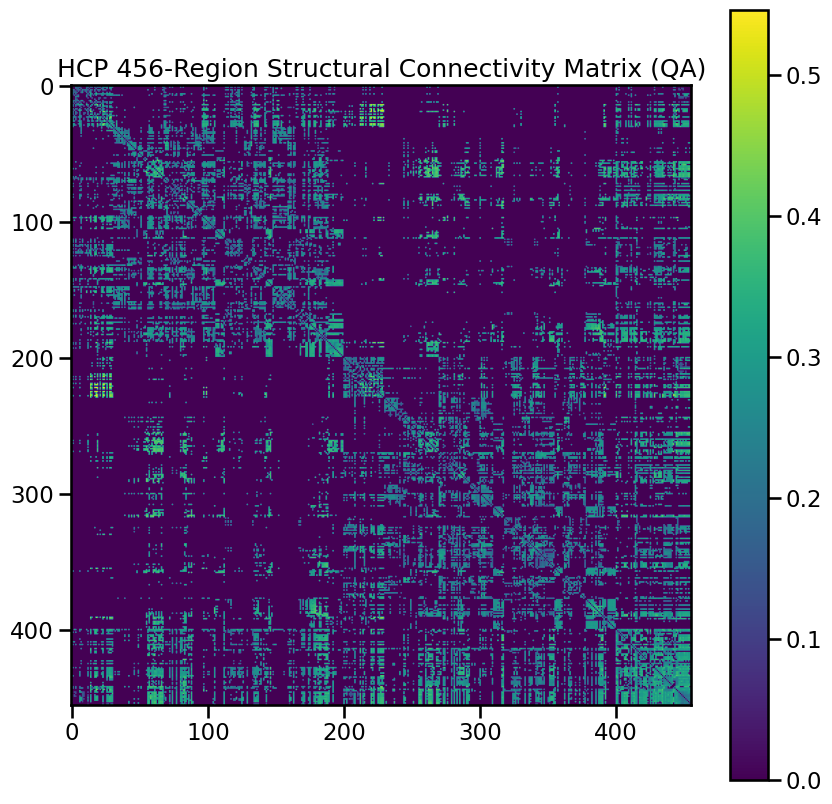

In [55]:
plt.figure(figsize=(10,10))
plt.imshow(HCP1200_S456_structural_QA, cmap='viridis')
plt.colorbar()
plt.title('HCP 456-Region Structural Connectivity Matrix (QA)')
plt.show()